# METADATA

EXERCISE 1

Employment.csv

time series data set about unemployment rates around the US

In [9]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

%matplotlib inline

# Q2

In [3]:
emp=pd.read_csv("employment.csv", parse_dates=True, index_col="datestamp")

In [4]:
emp.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [5]:
#find if there are any missing values

In [6]:
emp.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

In [7]:
#hence we can conclude that there are no missing values in the dataset

# Q3

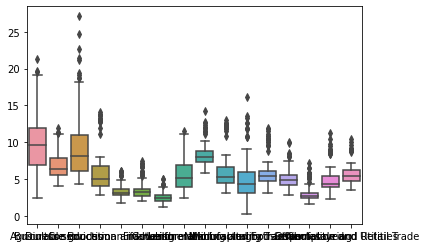

In [8]:
a =sb.boxplot(data=emp)

<AxesSubplot:>

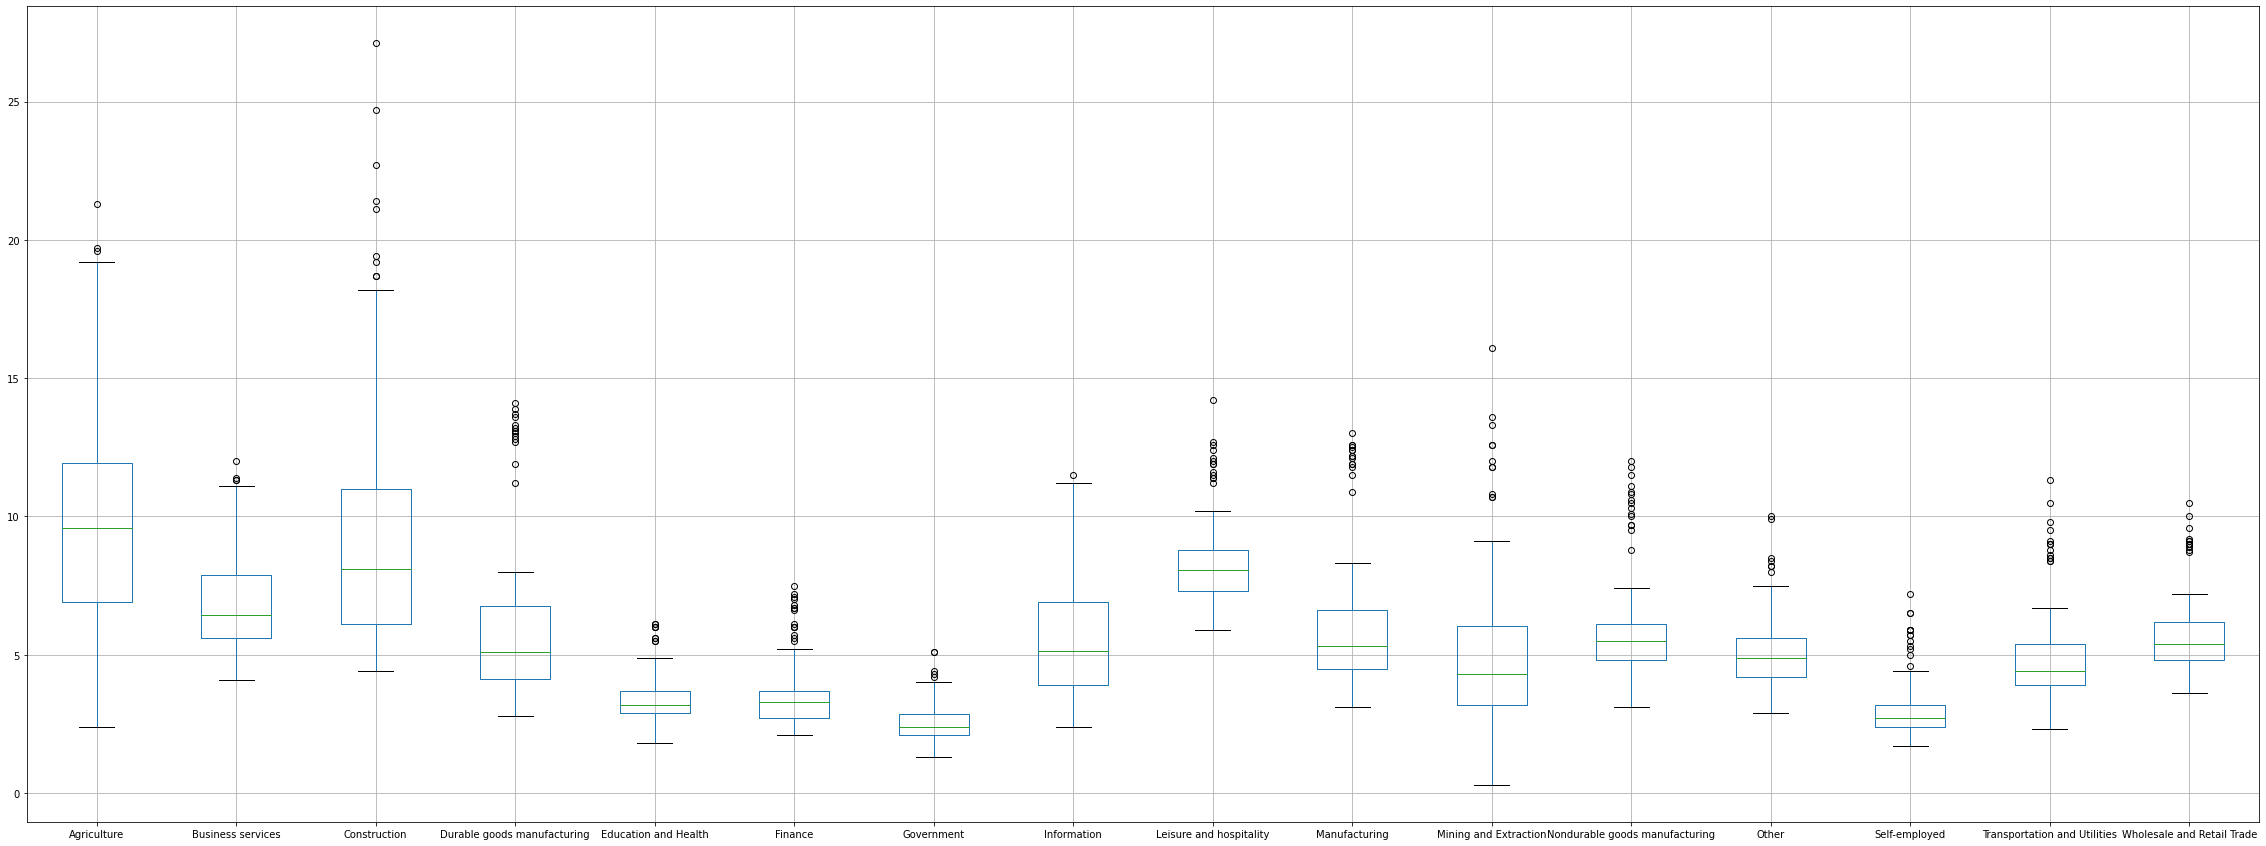

In [9]:
emp.boxplot(column=list(emp.columns),figsize=(40,15))

# Q4

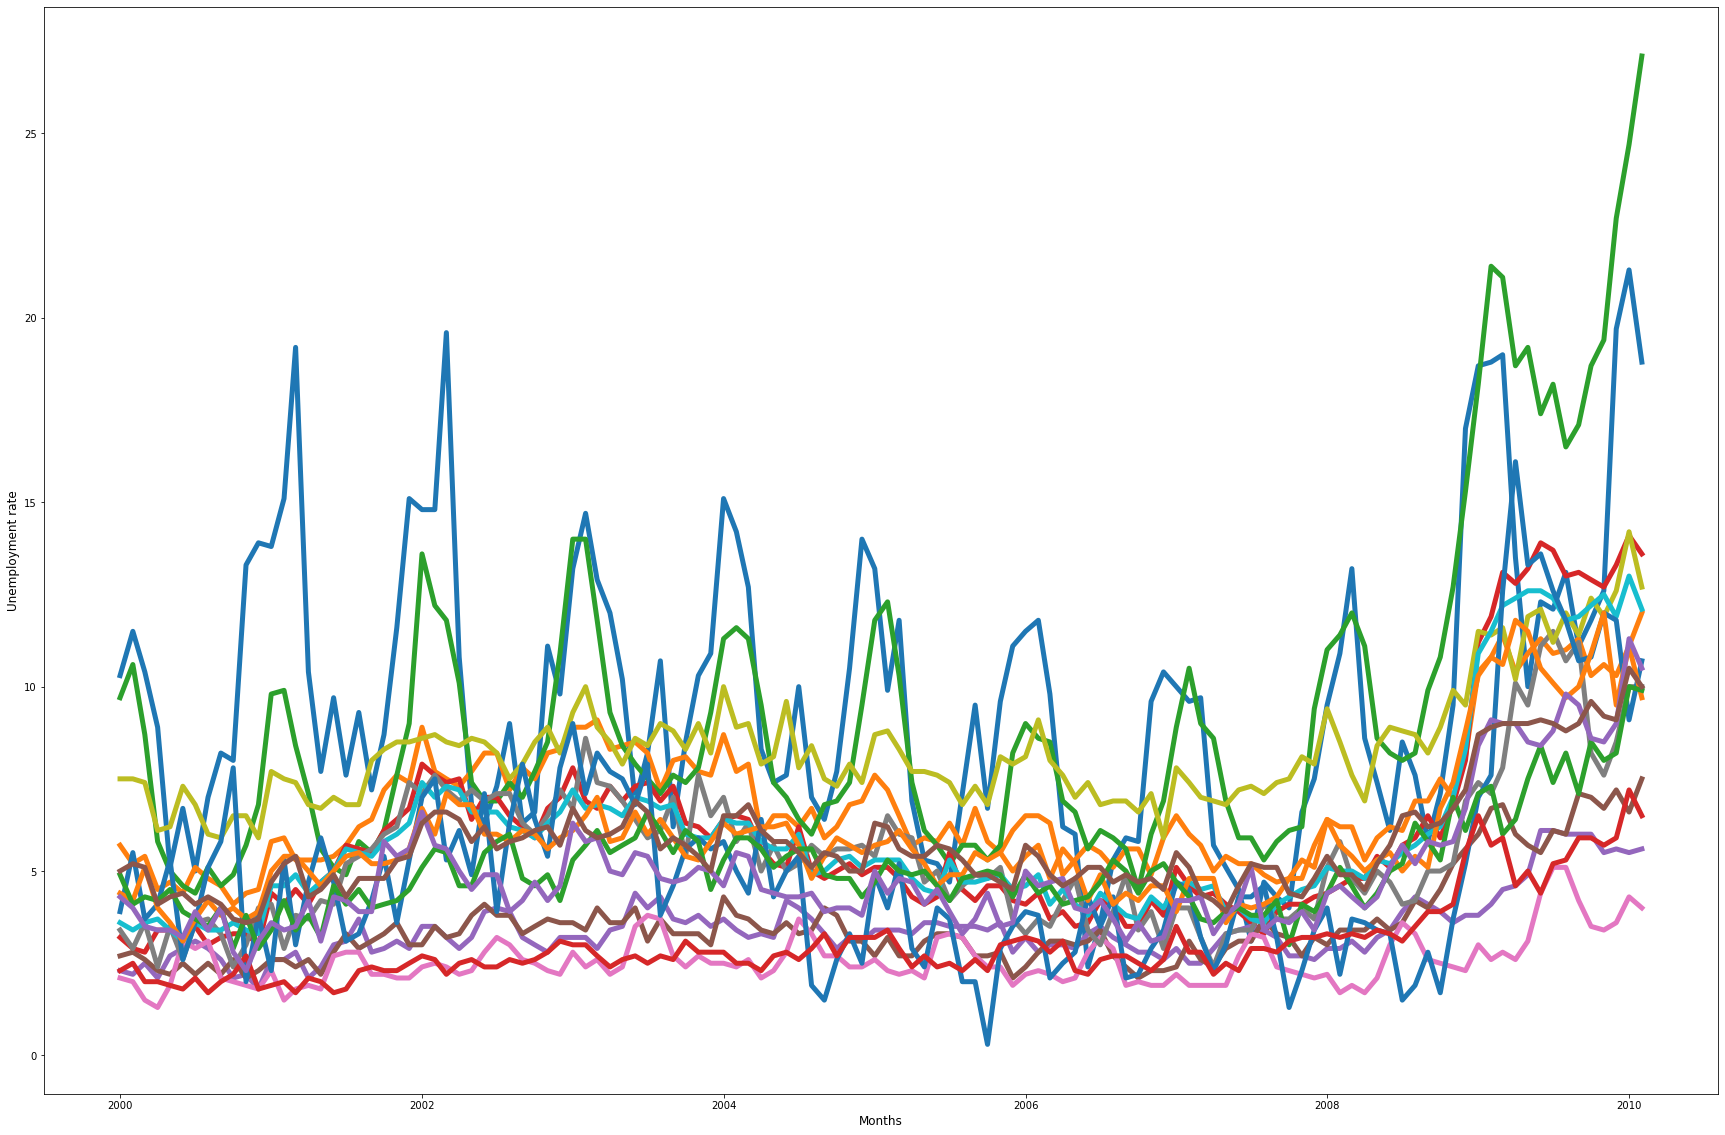

In [10]:
ax = plt.figure(figsize = (30,20))
plt.xlabel("Months",fontsize = 12)
plt.ylabel("Unemployment rate",fontsize = 12)
for x in emp.columns:
    plt.plot(emp[x],linewidth = 5,label=emp.columns)
#add x and y labels
# add legends

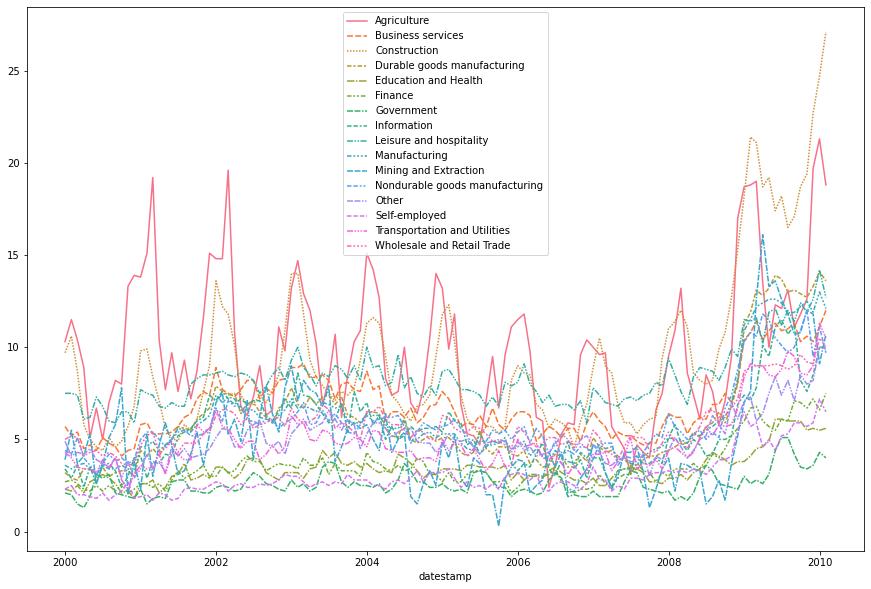

In [11]:
plt.figure(figsize=(15,10))
sb.lineplot(data=emp)
plt.show()

array([<AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>],
      dtype=object)

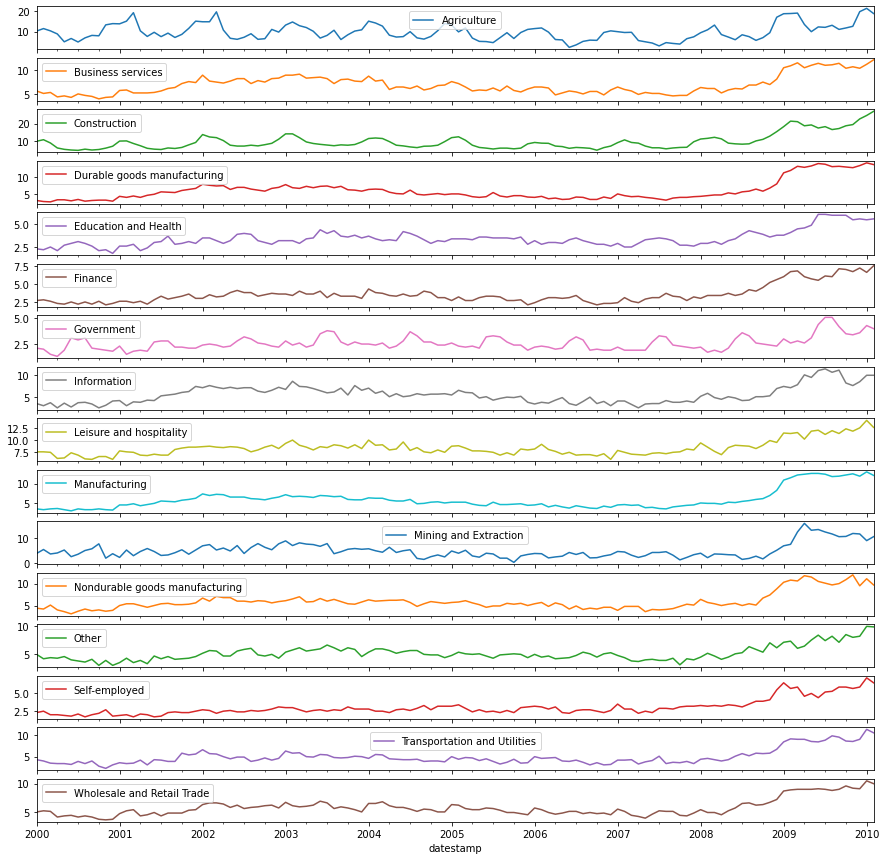

In [12]:
emp.plot(subplots=True, figsize=(15, 15))

# Q5

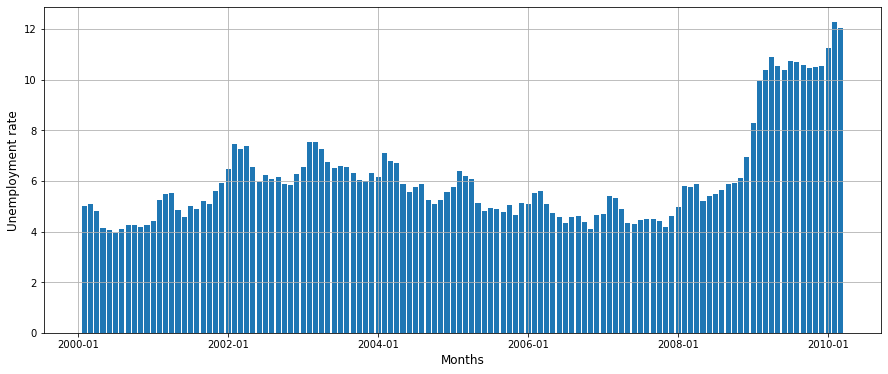

In [13]:
#MONTHLY TRENDS
emp["total_emp"] = emp.sum(axis=1)/(len(list(emp))-1)
emp_month = emp.resample("M").mean()
fig, ax = plt.subplots(figsize=(15,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(emp_month['2000':].index, emp_month.loc['2000':, "total_emp"], width=25, align='center')
plt.xlabel("Months",fontsize = 12)
plt.ylabel("Unemployment rate",fontsize = 12)
plt.grid()
plt.show()

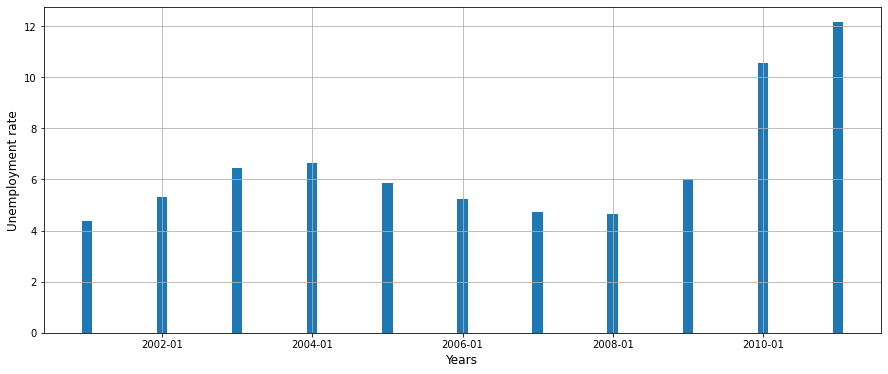

In [14]:
#YEARLY TRENDS
emp["total_emp"] = emp.sum(axis=1)/(len(list(emp))-1)
emp_year = emp.resample("Y").mean()
fig, ax = plt.subplots(figsize=(15,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(emp_year['2000':].index, emp_year.loc['2000':, "total_emp"], width=50, align='center')
plt.xlabel("Years",fontsize = 12)
plt.ylabel("Unemployment rate",fontsize = 12)
plt.grid()
plt.show()

# Q6

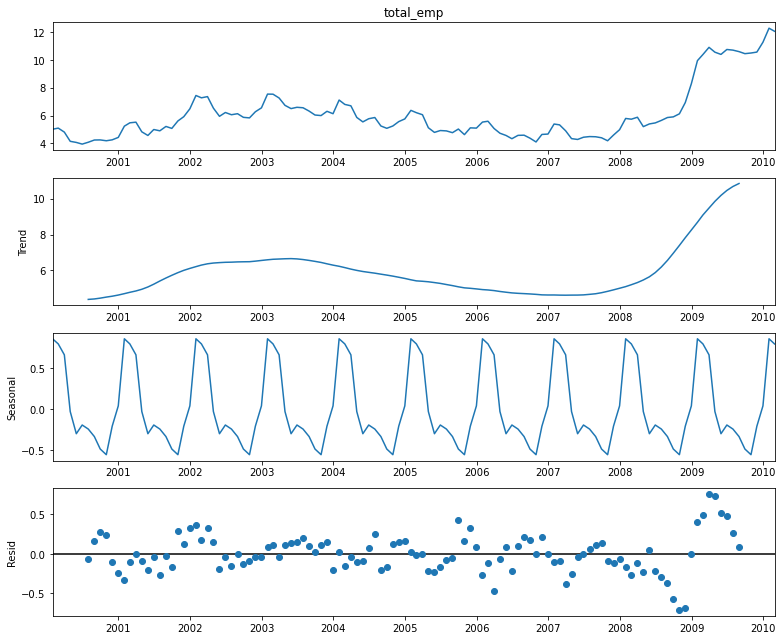

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(emp_month['total_emp'], model='Additive')
#The seasonal_decompose() method can take up to six parameters. 
fig = decomposition.plot()
plt.show()

# Q7

In [16]:
#seasonality of agriculture healt and finance sector

In [17]:
# for agriculture

Text(0, 0.5, 'Agriculture unemployment')

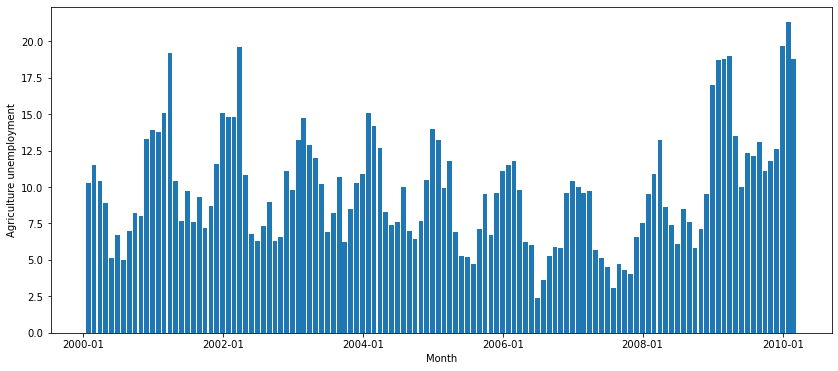

In [18]:
emp_agri = emp.resample("M").mean()
fig, ax = plt.subplots(figsize=(14,6))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #used to set the formatter of the major ticker.
ax.bar(emp_agri['2000':].index, emp_agri.loc['2000':, "Agriculture"], width=25, align='center')
plt.xlabel("Month")
plt.ylabel("Agriculture unemployment")

In [19]:
# for health

Text(0, 0.5, 'Health unemployment')

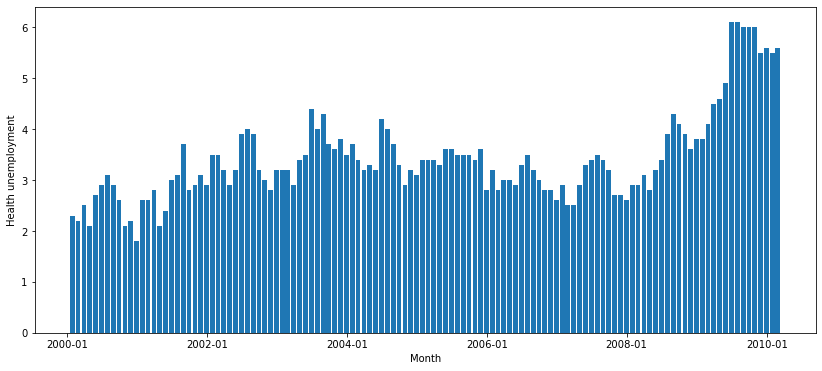

In [20]:
emp_health = emp.resample("M").mean()
fig, ax = plt.subplots(figsize=(14,6))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #used to set the formatter of the major ticker.
ax.bar(emp_health['2000':].index, emp_health.loc['2000':, "Education and Health"], width=25, align='center')
plt.xlabel("Month")
plt.ylabel("Health unemployment")

Text(0, 0.5, 'Health unemployment')

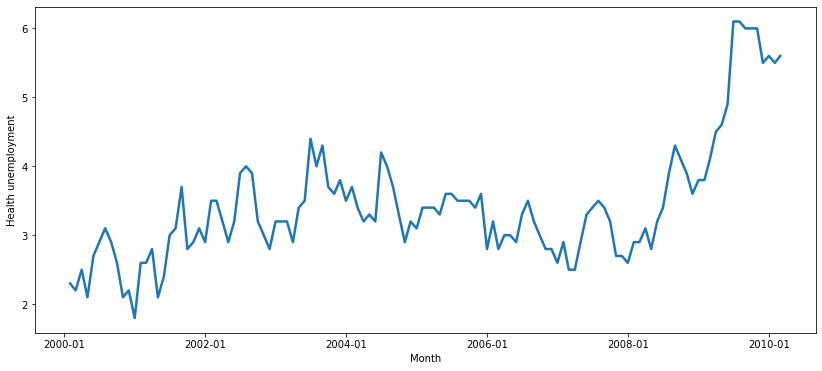

In [21]:
emp_health1 = emp.resample("M").mean()
fig, ax = plt.subplots(figsize=(14,6))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #used to set the formatter of the major ticker.
ax.plot(emp_health1['2000':].index, emp_health1.loc['2000':, "Education and Health"],linewidth ='2.5')
plt.xlabel("Month")
plt.ylabel("Health unemployment")

In [22]:
# for Finance Sector

Text(0, 0.5, 'Finance Unemployment')

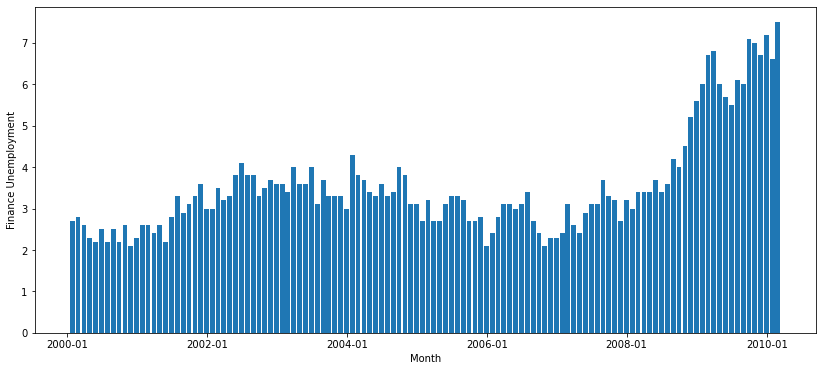

In [23]:
emp_fin = emp.resample("M").mean()
fig, ax = plt.subplots(figsize=(14,6))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #used to set the formatter of the major ticker.
ax.bar(emp_fin['2000':].index, emp_fin.loc['2000':, "Finance"], width=25, align='center')
plt.xlabel("Month")
plt.ylabel("Finance Unemployment")

In [24]:
#for all 3 in a single graph

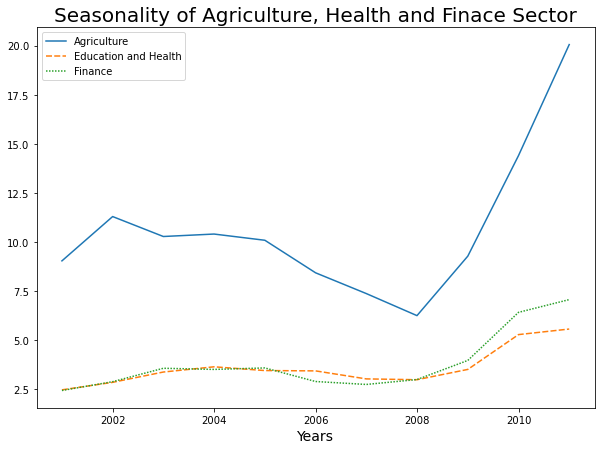

In [25]:
e_year = emp.resample("Y").mean()
plt.figure(figsize=(10,7))
plt.title("Seasonality of Agriculture, Health and Finace Sector",fontsize=20)
plt.xlabel("Years",fontsize=14)
sb.lineplot(data=e_year[["Agriculture","Education and Health","Finance"]])
plt.show()

# Q8

In [26]:
#Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

<Figure size 1080x720 with 0 Axes>

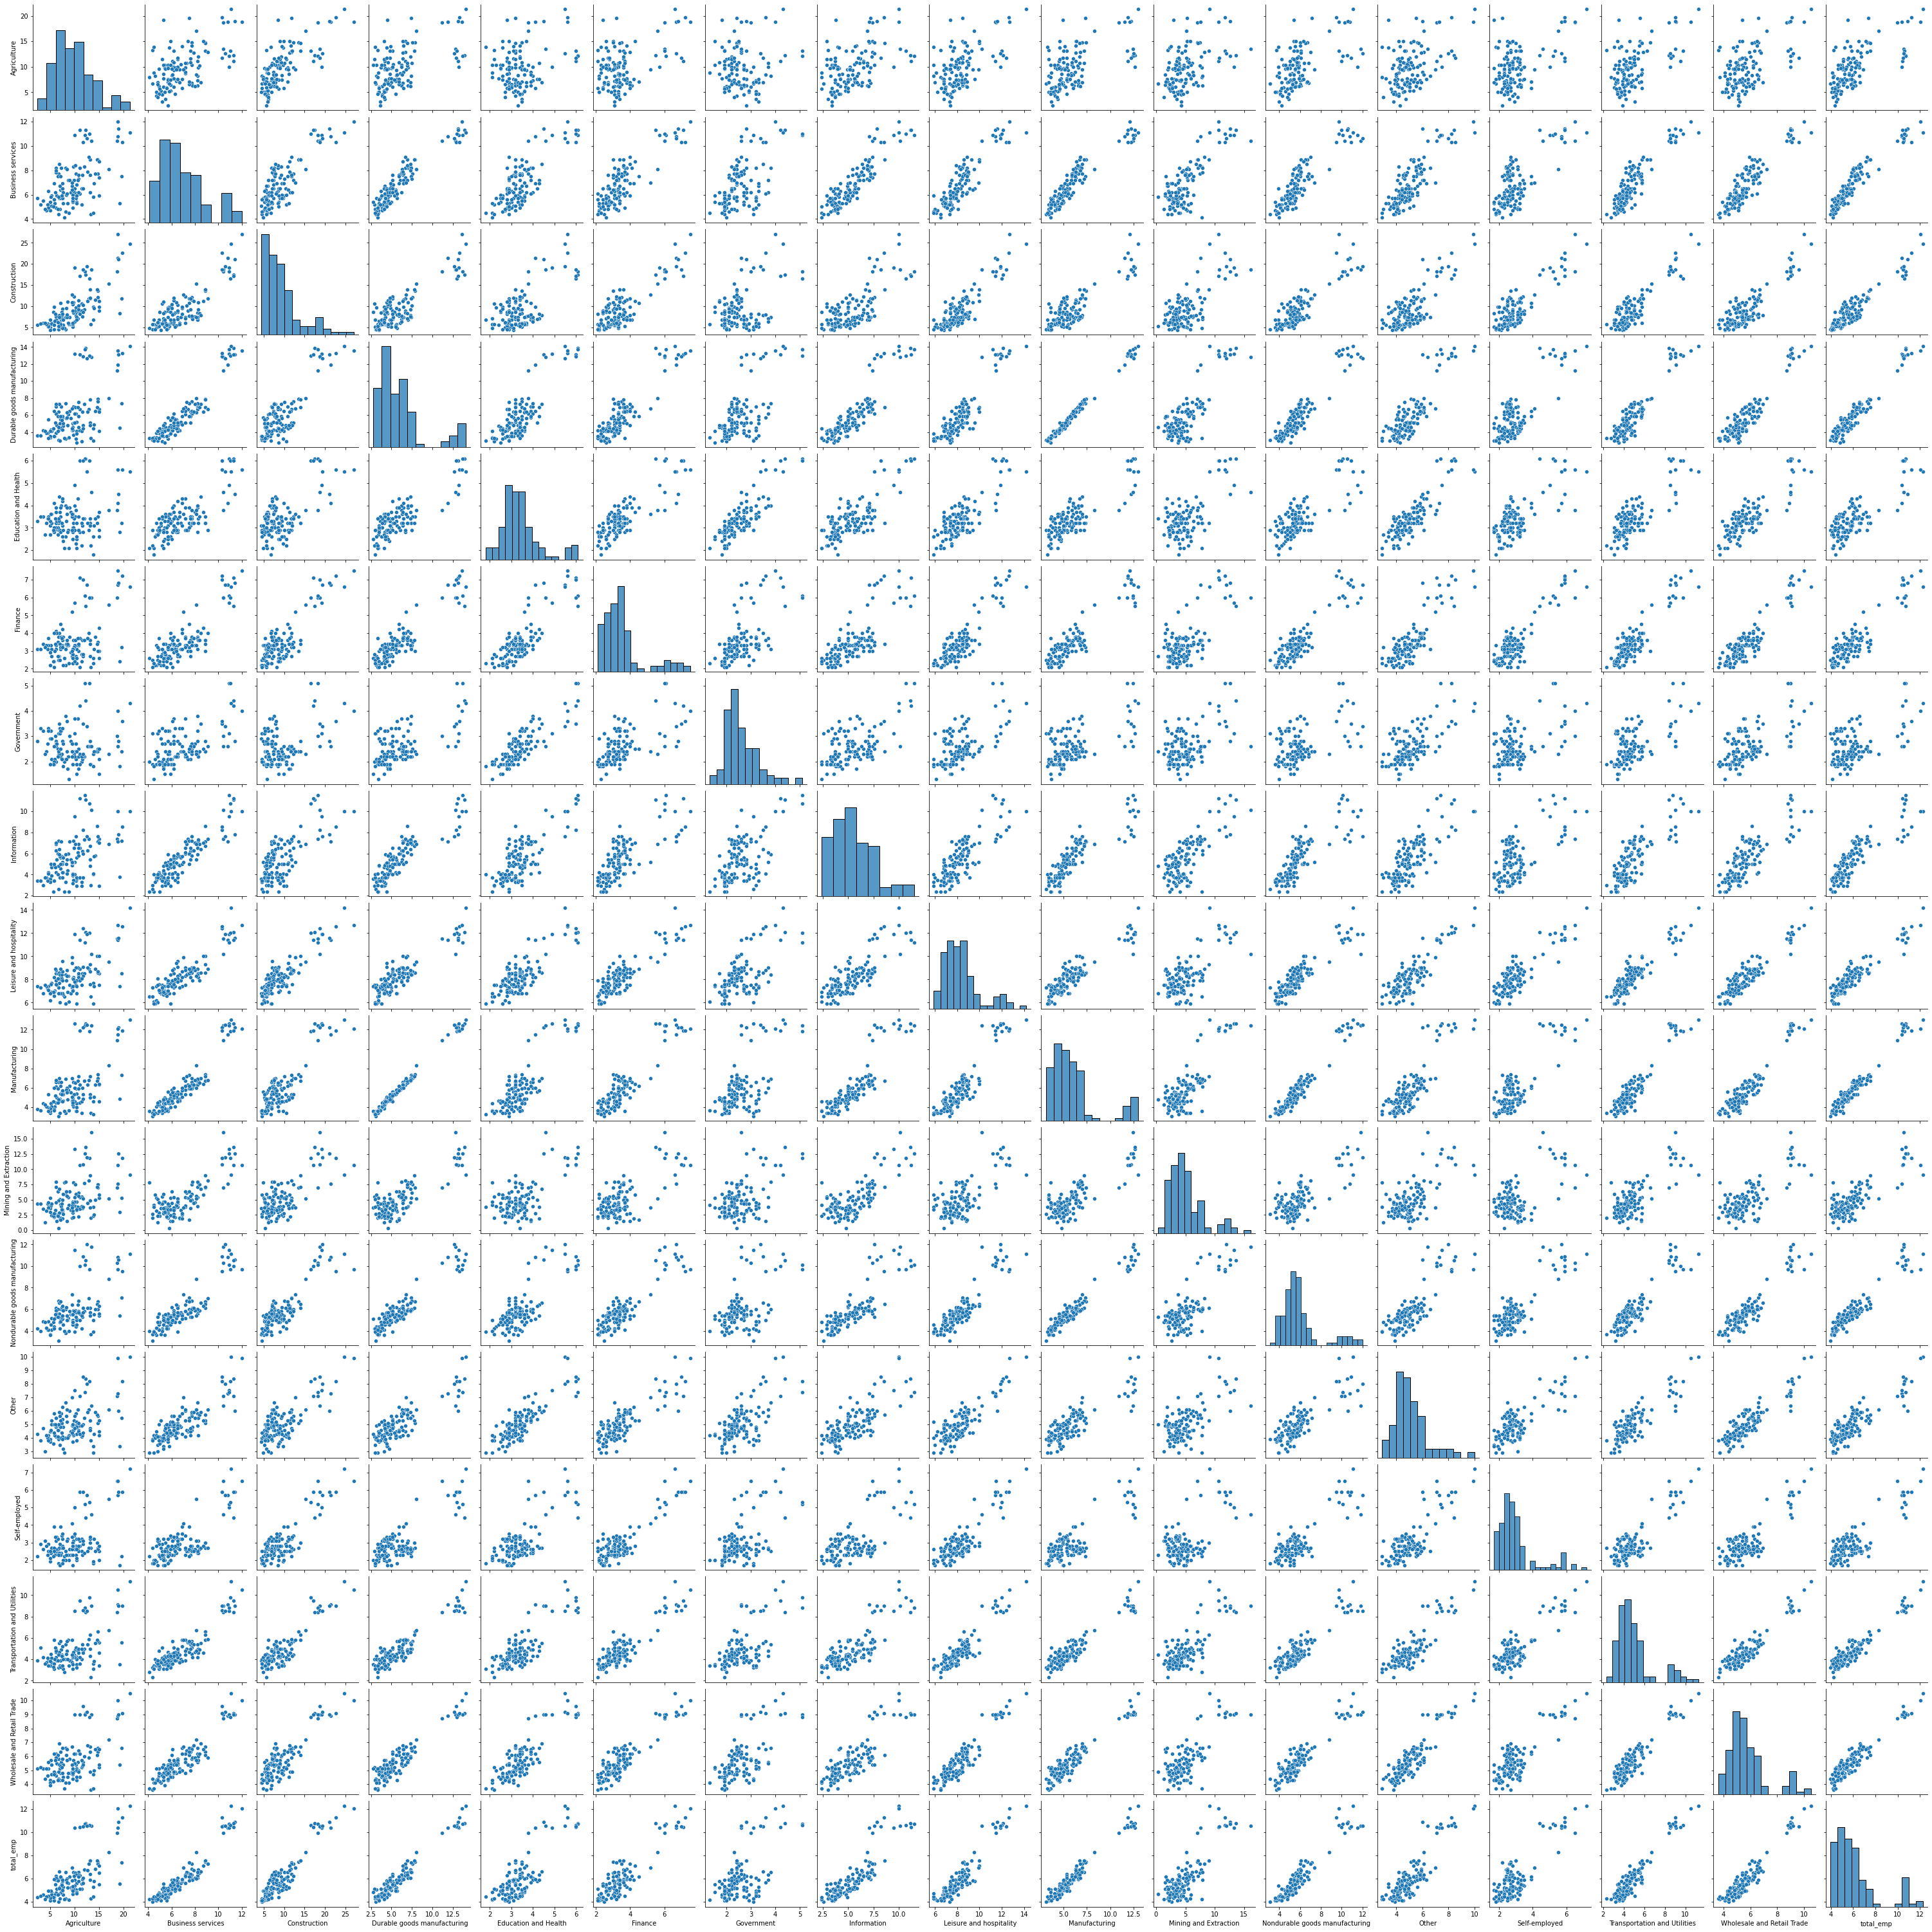

In [27]:
plt.figure(figsize=(15,10))
sb.pairplot(emp_month)
plt.show()

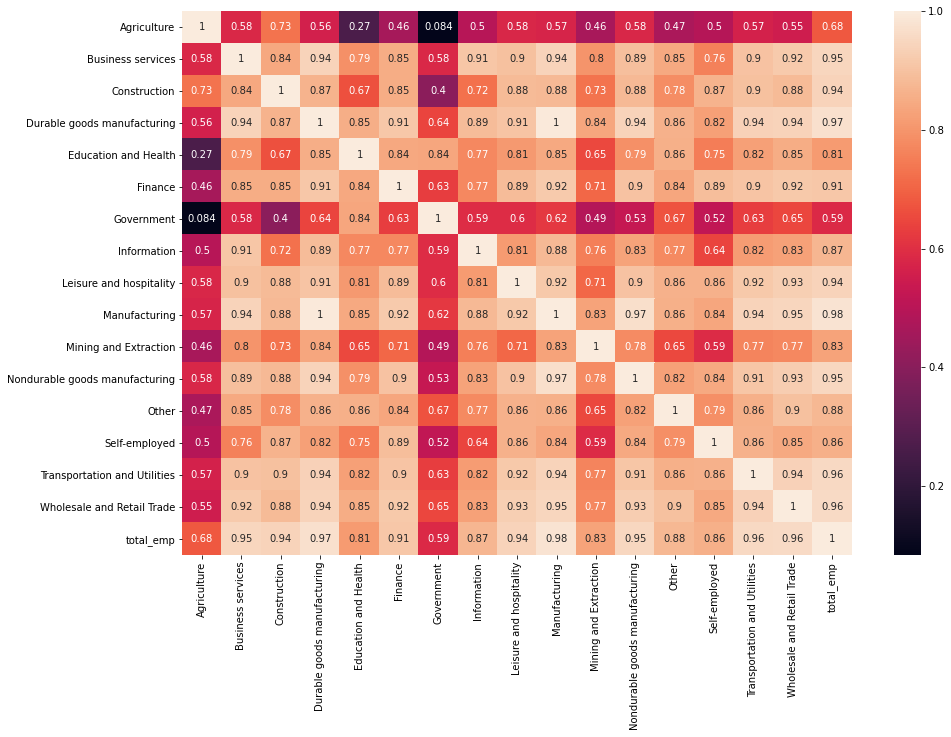

In [28]:
plt.figure(figsize=(15,10))
sb.heatmap(emp.corr(),annot=True)
plt.show()

# Exercise 2
GROCERIES DATASET

In [2]:
transactions = []
length=0
dataset = open("groceries1.txt", "r")
Content = dataset.read()
CotentList = Content.split("\n")

# Q9

In [3]:
for i in CotentList:
        length += 1
length

9836

In [31]:
# therefore there are 9835 transactions that take place.

# Q10

In [15]:
transactions = []
dataset = open("groceries1.txt", "r")
for i in dataset:
    transactions.append(i.split())

In [16]:
for c in transactions:
    c[-1]=c[-1].rstrip()

In [54]:
#Given the format that the data has we convert the file to text and read it using python file handling functions
#transactions = []
#dataset = open("groceries.txt", "r")
#for i in dataset:
#    transactions.append(i.split(sep=','))

In [17]:
transactions

[['citrus', 'fruit', 'semi-finished', 'bread', 'margarine', 'ready', 'soups'],
 ['tropical', 'fruit', 'yogurt', 'coffee'],
 ['whole', 'milk'],
 ['pip', 'fruit', 'yogurt', 'cream', 'cheese', 'meat', 'spreads'],
 ['other',
  'vegetables',
  'whole',
  'milk',
  'condensed',
  'milk',
  'long',
  'life',
  'bakery',
  'product'],
 ['whole', 'milk', 'butter', 'yogurt', 'rice', 'abrasive', 'cleaner'],
 ['rolls/buns'],
 ['other',
  'vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled',
  'beer',
  'liquor',
  '(appetizer)'],
 ['pot', 'plants'],
 ['whole', 'milk', 'cereals'],
 ['tropical',
  'fruit',
  'other',
  'vegetables',
  'white',
  'bread',
  'bottled',
  'water',
  'chocolate'],
 ['citrus',
  'fruit',
  'tropical',
  'fruit',
  'whole',
  'milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled',
  'water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical', 'fruit'],
 ['butter', 'sugar', 'fruit/vegetable', 'juice', 'newspapers'],
 ['frui

# Q11

In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
encoder = TransactionEncoder()
tr = encoder.fit(transactions).transform(transactions)
tr=tr.astype('int')
df = pd.DataFrame(tr, columns=encoder.columns_)
df

,(appetizer),(seeds),Instant,UHT-milk,abrasive,alcohol,articles,artif.,baby,bags,...,vinegar,waffles,water,whipped/sour,whisky,white,whole,wine,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Q12

In [45]:
# top selling items with min support 2%

In [19]:
top = apriori(df, min_support=0.02, use_colnames=1)
top['length'] = top['itemsets'].apply(lambda x: len(x))
top[top.support==top.support.max()]

,support,itemsets,length
70,0.293747,(vegetables),1


# Q13

In [20]:
frequent = apriori(df, min_support=0.05, use_colnames=True)
frequent['length'] = frequent['itemsets'].apply(lambda x: len(x))
frequent

,support,itemsets,length
0,0.098932,(bags),1
1,0.052466,(beef),1
2,0.155567,(beer),1
3,0.053482,(beverages),1
4,0.175292,(bottled),1
...,...,...,...
96,0.051754,"(milk, root, vegetables)",3
97,0.113879,"(milk, whole, vegetables)",3
98,0.056024,"(yogurt, milk, whole)",3
99,0.074835,"(whole, vegetables, other)",3


# Q14

In [49]:
top[top.length==2]

,support,itemsets,length
78,0.032944,"(articles, hygiene)",2
79,0.025724,"(bags, fruit)",2
80,0.027860,"(bags, milk)",2
81,0.023183,"(bags, other)",2
82,0.098526,"(bags, shopping)",2
...,...,...,...
339,0.022979,"(water, yogurt)",2
340,0.032232,"(whole, whipped/sour)",2
341,0.020742,"(whipped/sour, yogurt)",2
342,0.020336,"(white, wine)",2


# Q15

In [21]:
association_rules(top, metric="confidence", min_threshold=0).sort_values('confidence',ascending=False,ignore_index=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hygiene),(articles),0.032944,0.032944,0.032944,1.0,30.354938,0.031858,inf
1,"(tropical, other)",(fruit),0.035892,0.216472,0.035892,1.0,4.619540,0.028123,inf
2,"(whole, frozen)",(milk),0.037417,0.279614,0.037417,1.0,3.576364,0.026955,inf
3,"(frozen, other)",(vegetables),0.031622,0.293747,0.031622,1.0,3.404292,0.022333,inf
4,"(fruit, juice)",(fruit/vegetable),0.025623,0.072293,0.025623,1.0,13.832630,0.023770,inf
5,"(fruit, fruit/vegetable)",(juice),0.025623,0.072293,0.025623,1.0,13.832630,0.023770,inf
6,"(milk, pip)",(fruit),0.033452,0.216472,0.033452,1.0,4.619540,0.026211,inf
7,"(milk, tropical)",(fruit),0.045958,0.216472,0.045958,1.0,4.619540,0.036010,inf
8,"(whole, fruit)",(milk),0.082766,0.279614,0.082766,1.0,3.576364,0.059623,inf
9,"(pip, other)",(fruit),0.026131,0.216472,0.026131,1.0,4.619540,0.020475,inf


# Q16

In [51]:
a_rules=association_rules(top, metric="confidence", min_threshold=0)
a_rules[a_rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(articles),(hygiene),0.032944,0.032944,0.032944,1.000000,30.354938,0.031858,inf
1,(hygiene),(articles),0.032944,0.032944,0.032944,1.000000,30.354938,0.031858,inf
2,(bags),(fruit),0.098932,0.216472,0.025724,0.260021,1.201175,0.004308,1.058851
3,(fruit),(bags),0.216472,0.098932,0.025724,0.118835,1.201175,0.004308,1.022587
4,(bags),(milk),0.098932,0.279614,0.027860,0.281603,1.007116,0.000197,1.002770
...,...,...,...,...,...,...,...,...,...
2985,(vegetables),"(milk, whole, yogurt, other)",0.293747,0.022267,0.022267,0.075805,3.404292,0.015726,1.057929
2986,(yogurt),"(whole, vegetables, milk, other)",0.139502,0.074835,0.022267,0.159621,2.132979,0.011828,1.100890
2987,(whole),"(milk, vegetables, yogurt, other)",0.255516,0.024504,0.022267,0.087147,3.556386,0.016006,1.068623
2988,(other),"(whole, vegetables, yogurt, milk)",0.193493,0.033147,0.022267,0.115081,3.471859,0.015854,1.092590
